### Financial Inclusion & Household Economic Resilience in Kenya and Sub-Saharan Africa

In [ ]:
import sys; print(sys.executable)

c:\Users\Kim\Desktop\financial_inclusion_project\finclusion_env\Scripts\python.exe


## Financial Inclusion & Household Economic Resilience in Kenya and Sub-Saharan Africa

### 1.2 Business Context

Financial inclusion is a key driver of economic development, poverty reduction, and household resilience. Access to formal financial services—such as bank accounts—enables households to save securely, receive payments, access credit, manage risks, and withstand economic shocks. In Kenya and Sub-Saharan Africa, many households remain financially excluded due to structural and socio-economic barriers including education level, employment type, rural/urban access, gender dynamics, household characteristics, and limited access to digital tools such as mobile phones. Governments, banks, fintech firms, insurers, and development organizations invest in inclusion programs, but success depends on accurate targeting and evidence-driven product and policy design. This project uses household-level survey data and machine learning to understand and predict bank account ownership, generating actionable insights to improve inclusion strategies and strengthen household resilience.

### 1.3 Business Problem

Despite ongoing financial inclusion initiatives, a significant share of households remain unbanked. Stakeholders need analytical tools to:

identify populations most likely to adopt formal financial services,

understand the drivers of exclusion and adoption, and

design targeted products and interventions (e.g., low-cost accounts, agent banking expansion, mobile-enabled onboarding, financial literacy programs).
Without data-driven segmentation and prediction, resources can be misallocated and programs may deliver limited measurable impact.

### 1.4 Project Objectives

This project aims to build an end-to-end analytics solution that:

Predicts financial inclusion by classifying whether a household respondent owns a bank account (bank_account).

Identifies key drivers of bank account ownership across demographic, social, and economic factors.

Produces actionable segmentation to support stakeholder targeting (e.g., groups with low inclusion probability and shared barriers).

Generates stakeholder-ready outputs including interpretable model results, country-specific insights (especially Kenya), and reporting-ready datasets for dashboards.

### 1.5 Stakeholders and Intended Users

Primary stakeholders and users include:

Banks & Microfinance Institutions: customer acquisition, branch/agent placement, product pricing, and onboarding strategy

Fintech & Mobile Money Providers: conversion of mobile users into formal financial services, product bundling, and retention strategy

Insurance Providers: risk segmentation and inclusion-linked micro-insurance design

Government & Regulators: national financial inclusion policy, resource allocation, monitoring and evaluation

NGOs & Development Partners: targeted interventions, financial literacy, impact evaluation

Credit/Risk Analytics Teams: scorecards, segmentation, and data-driven decision support

### 1.6 Data Science Problem Definition

Task type: Binary classification

Target variable: bank_account (Yes/No → will be encoded as 1/0)

Model output: probability score + predicted class

Primary use: identify drivers and predict inclusion likelihood for targeting

Secondary analytics (optional but recommended if useful)

Resilience profiling: develop interpretable household profiles (e.g., economically vulnerable segments) using proxy variables such as job type, education level, phone access, location type, and household size.

Country-specific insights: compare Kenya to other countries in the dataset and highlight unique patterns.

### 1.7 Assumptions, Constraints, and Risks
Assumptions

Survey responses are reasonably accurate representations of household conditions.

Bank account ownership is a practical proxy for formal financial inclusion in this dataset.

Constraints

The dataset is survey-based and may not include direct income, consumption, or shock exposure measures.

Class imbalance may exist (often fewer “Yes” than “No”), which can affect modeling and evaluation.

Risks and Mitigations

Risk: class imbalance → use stratified split and report ROC-AUC, precision/recall, and confusion matrix.

Risk: country heterogeneity → include country as a feature and also assess Kenya-only performance.

Risk: interpretability needs → include Logistic Regression baseline and clear feature importance reporting.


## CRISP-DM PHASE 2 — DATA UNDERSTANDING
#### 2.1 Loading the Core Datasets

In [4]:
# Data handling (libraries)
import pandas as pd
import numpy as np

# Display options (optional but useful for inspection)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [6]:
# Load training data (includes target column: bank_account)
train = pd.read_csv("../data_raw/Train.csv")

# Load test data (same features as train, but without bank_account)
test = pd.read_csv("../data_raw/Test.csv")

# Load variable definitions (data dictionary)
vardef = pd.read_csv("../data_raw/VariableDefinitions.csv")

# Print shapes to confirm successful load and expected dimensions
print("Train shape:", train.shape)
print("Test shape :", test.shape)
print("VarDef shape:", vardef.shape)

# Preview the first rows to verify columns and values
train.head(15)


Train shape: (23524, 13)
Test shape : (10086, 12)
VarDef shape: (12, 2)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


#### 2.2 Understand the Variables (Data Dictionary)

In [8]:
# Display variable definitions to understand what each feature represents
vardef

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


#### 2.3 Data Structure and Types

In [9]:
# Show column names, dtypes, and non-null counts for quality checks and feature typing
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


#### 2.4 Target Variable Inspection (Class Balance)

In [11]:
# Display counts of the target classes ("Yes" / "No")
print(train["bank_account"].value_counts())

# Display proportions to understand imbalance (important for evaluation strategy)
print(train["bank_account"].value_counts(normalize=True))


bank_account
No     20212
Yes     3312
Name: count, dtype: int64
bank_account
No     0.859208
Yes    0.140792
Name: proportion, dtype: float64


#### 2.5 Country Coverage (Kenya + Regional Comparison)

In [12]:
# Count number of observations per country
country_counts = train["country"].value_counts()

# Display country counts
country_counts


country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

In [13]:
# Filter the dataset for Kenya records (case-insensitive match)
kenya = train[train["country"].str.lower() == "kenya"].copy()

# Print Kenya record count
print("Kenya rows:", kenya.shape[0])

# Compute Kenya's bank account ownership distribution
print(kenya["bank_account"].value_counts())
print(kenya["bank_account"].value_counts(normalize=True))


Kenya rows: 6068
bank_account
No     4547
Yes    1521
Name: count, dtype: int64
bank_account
No     0.749341
Yes    0.250659
Name: proportion, dtype: float64


#### 2.6 Data Quality Checks (Missing Values, Duplicates)

In [14]:
# Check missing values per column (ideal is 0 for all columns)
missing_counts = train.isna().sum().sort_values(ascending=False)

# Display missing values (top-first)
missing_counts


country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [15]:
# Count fully duplicated rows (duplicates can bias training and evaluation)
dup_count = train.duplicated().sum()

print("Duplicate rows:", dup_count)

Duplicate rows: 0


#### 2.7 Basic Descriptive Statistics (Numeric Features)

In [19]:
# Summarize numeric columns to understand ranges and potential outliers
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


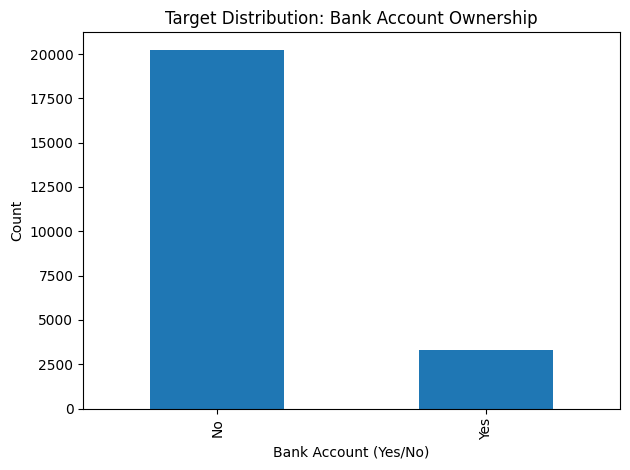

In [21]:
# Target distribution plot
# Plot class distribution for bank_account to visualize imbalance
import matplotlib.pyplot as plt

train["bank_account"].value_counts().plot(kind="bar")
plt.title("Target Distribution: Bank Account Ownership")
plt.xlabel("Bank Account (Yes/No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Top countries by banked rate:
country
Kenya       0.250659
Rwanda      0.114825
Tanzania    0.091692
Uganda      0.086149
Name: bank_account, dtype: float64

Bottom countries by banked rate:
country
Kenya       0.250659
Rwanda      0.114825
Tanzania    0.091692
Uganda      0.086149
Name: bank_account, dtype: float64


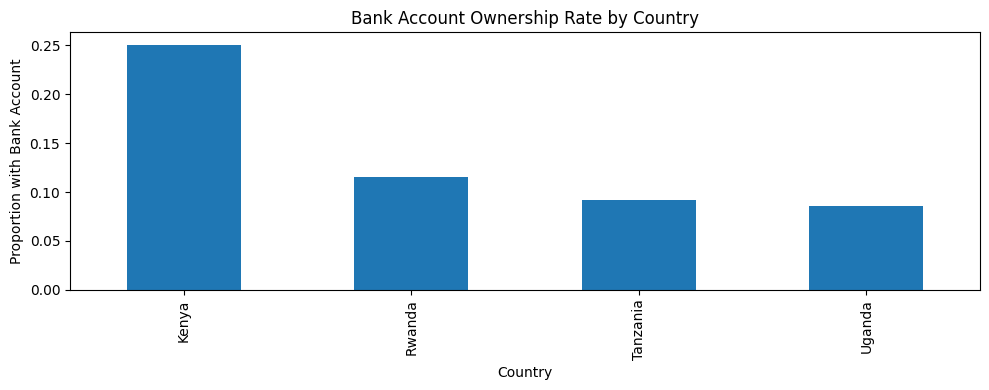

In [22]:
# Compute banked rate by country ("Yes" proportion)
banked_rate_by_country = (train["bank_account"] == "Yes").groupby(train["country"]).mean().sort_values(ascending=False)

# Show top and bottom countries by banked rate
print("Top countries by banked rate:")
print(banked_rate_by_country.head(10))

print("\nBottom countries by banked rate:")
print(banked_rate_by_country.tail(10))

# Plot banked rate by country
banked_rate_by_country.plot(kind="bar", figsize=(10,4))
plt.title("Bank Account Ownership Rate by Country")
plt.xlabel("Country")
plt.ylabel("Proportion with Bank Account")
plt.tight_layout()
plt.show()


## PHASE 3 — DATA PREPARATION
#### Converting raw survey data into a reproducible, model-ready dataset using pipelines.

In [23]:
# Create a working copy
df = train.copy()

# Encode target: Yes -> 1, No -> 0
df["bank_account"] = df["bank_account"].map({"Yes": 1, "No": 0})

# Drop non-predictive identifier
df = df.drop(columns=["uniqueid"])

# Quick check
df.head(), df["bank_account"].value_counts()


(  country  year  bank_account location_type cellphone_access  household_size  age_of_respondent gender_of_respondent  \
 0   Kenya  2018             1         Rural              Yes               3                 24               Female   
 1   Kenya  2018             0         Rural               No               5                 70               Female   
 2   Kenya  2018             1         Urban              Yes               5                 26                 Male   
 3   Kenya  2018             0         Rural              Yes               5                 34               Female   
 4   Kenya  2018             0         Urban               No               8                 26                 Male   
 
   relationship_with_head           marital_status                  education_level                   job_type  
 0                 Spouse  Married/Living together              Secondary education              Self employed  
 1      Head of Household                  Wid

In [24]:
# Define features (X) and target (y)
X = df.drop(columns=["bank_account"])
y = df["bank_account"]

# Confirm shapes
X.shape, y.shape

((23524, 11), (23524,))

In [25]:
# Categorical columns (to be one-hot encoded)
categorical_cols = X.select_dtypes(include="object").columns.tolist()

# Numerical columns (passed through)
numerical_cols = X.select_dtypes(exclude="object").columns.tolist()

categorical_cols, numerical_cols

(['country',
  'location_type',
  'cellphone_access',
  'gender_of_respondent',
  'relationship_with_head',
  'marital_status',
  'education_level',
  'job_type'],
 ['year', 'household_size', 'age_of_respondent'])

In [26]:
from sklearn.model_selection import train_test_split

# Preserve class balance with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_val.shape

((18819, 11), (4705, 11))

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One-hot encode categoricals; pass-through numerics
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols),
    ]
)

preprocessor


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

## CRISP-DM Phase 4 — Modeling
#### Train Logistic Regression (interpretable regression analysis)

Train Random Forest (“forest” model)

Compare performance

Generate confusion matrices

Plot ROC curves

Measure ROC-AUC, precision, recall, F1

#### 4.1 Modeling Setup (Imports & Reproducibility)

In [28]:
# Imports for modeling and evaluation
# Core ML utilities
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics & plots
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent plots
sns.set(style="whitegrid")


#### 4.2 Baseline Model — Logistic Regression (Interpretable “Regression Analysis”)

In [29]:
# Build a pipeline: preprocessing + logistic regression
logit_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=2000))
])

# Train the baseline model
logit_model.fit(X_train, y_train)


c:\Users\Kim\Desktop\financial_inclusion_project\finclusion_env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contai

=== Logistic Regression: Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4043
           1       0.71      0.36      0.48       662

    accuracy                           0.89      4705
   macro avg       0.81      0.67      0.71      4705
weighted avg       0.88      0.89      0.87      4705

ROC-AUC (Logistic Regression): 0.8642278661488694


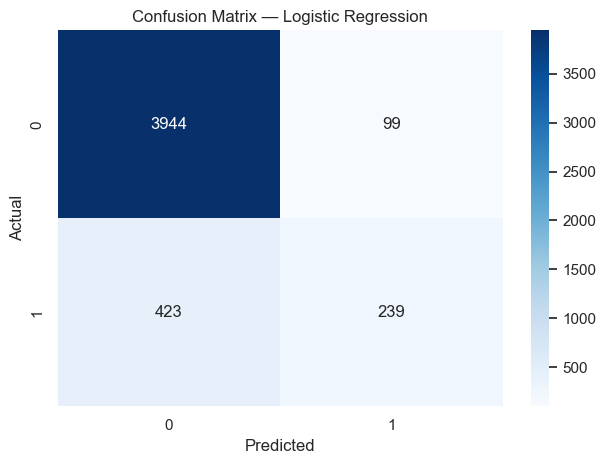

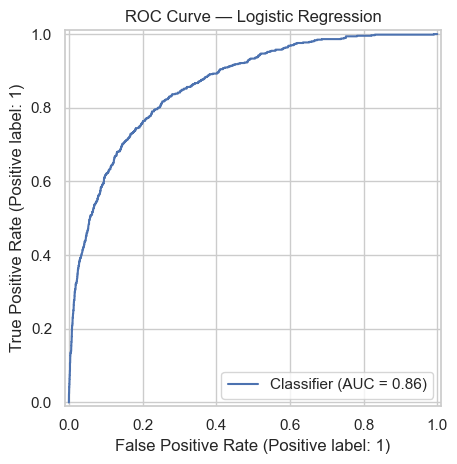

In [30]:
# Predict classes and probabilities on validation set
y_pred_logit = logit_model.predict(X_val)
y_prob_logit = logit_model.predict_proba(X_val)[:, 1]

# Print classification metrics
print("=== Logistic Regression: Classification Report ===")
print(classification_report(y_val, y_pred_logit))

# Compute ROC-AUC
roc_auc_logit = roc_auc_score(y_val, y_prob_logit)
print("ROC-AUC (Logistic Regression):", roc_auc_logit)

# Plot confusion matrix
cm_logit = confusion_matrix(y_val, y_pred_logit)
sns.heatmap(cm_logit, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curve
RocCurveDisplay.from_predictions(y_val, y_prob_logit)
plt.title("ROC Curve — Logistic Regression")
plt.tight_layout()
plt.show()


#### 4.3 Non-Linear Model — Random Forest (“Forest Model”)

In [33]:
#Build & train Random Forest pipeline
# Build a pipeline: preprocessing + random forest
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=400,      # number of trees
        random_state=42,      # reproducibility
        n_jobs=-1             # use all cores
    ))
])

# Train the forest model
rf_model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contai

=== Random Forest: Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4043
           1       0.53      0.44      0.48       662

    accuracy                           0.87      4705
   macro avg       0.72      0.69      0.70      4705
weighted avg       0.86      0.87      0.86      4705

ROC-AUC (Random Forest): 0.8293793009139664


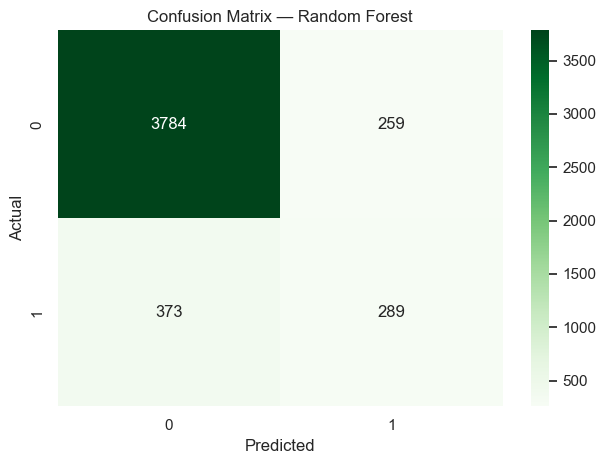

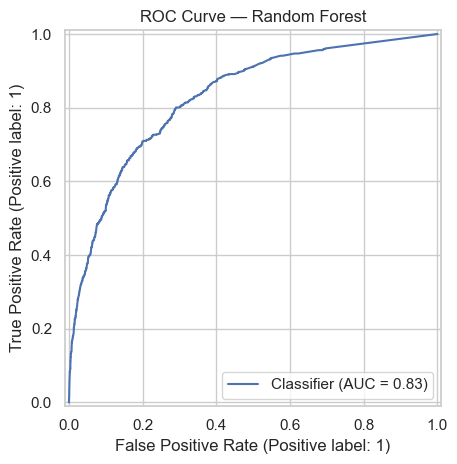

In [34]:
# Evaluate Random Forest (metrics, confusion matrix, ROC)
# Predict classes and probabilities on validation set
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# Print classification metrics
print("=== Random Forest: Classification Report ===")
print(classification_report(y_val, y_pred_rf))

# Compute ROC-AUC
roc_auc_rf = roc_auc_score(y_val, y_prob_rf)
print("ROC-AUC (Random Forest):", roc_auc_rf)

# Plot confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix — Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curve
RocCurveDisplay.from_predictions(y_val, y_prob_rf)
plt.title("ROC Curve — Random Forest")
plt.tight_layout()
plt.show()


#### 4.4 Model Comparison - Summary

In [35]:
#Compare ROC-AUC
# Summarize model performance for quick comparison
performance = {
    "Logistic Regression ROC-AUC": roc_auc_logit,
    "Random Forest ROC-AUC": roc_auc_rf
}

performance


{'Logistic Regression ROC-AUC': 0.8642278661488694,
 'Random Forest ROC-AUC': 0.8293793009139664}

#### Model Results Interpretation & Technical Summary

In this phase, two classification models were trained and evaluated to predict household financial inclusion (bank_account):

Logistic Regression — baseline interpretable regression model

Random Forest — non-linear ensemble (“forest”) model

Both models were trained using a full preprocessing pipeline with one-hot encoding for categorical variables and evaluated on a stratified validation set.

4.1 Model Performance Overview

| Model                   | Accuracy | ROC-AUC   | Strength                                |
| ----------------------- | -------- | --------- | --------------------------------------- |
| **Logistic Regression** | **89%**  | **0.864** | Best overall performance, interpretable |
| Random Forest           | 87%      | 0.829     | Captures non-linear patterns            |

Logistic Regression
It achieves the highest ROC-AUC and better overall balance between precision and recall.

4.2 Logistic Regression — Detailed Interpretation

Confusion Matrix
| Actual →          | Predicted No | Predicted Yes |
| ----------------- | ------------ | ------------- |
| **No (Unbanked)** | 3,944        | 99            |
| **Yes (Banked)**  | 423          | 239           |

Classification Report
| Class        | Precision | Recall | F1   |
| ------------ | --------- | ------ | ---- |
| Unbanked (0) | 0.90      | 0.98   | 0.94 |
| Banked (1)   | 0.71      | 0.36   | 0.48 |


Key Insights

The model is excellent at identifying unbanked households (98% recall).

It correctly identifies 36% of banked households — which is reasonable given strong class imbalance.

Precision for banked households is high (71%) → predictions are reliable.

ROC-AUC = 0.864 → strong discrimination ability.

Business Meaning

The model is very effective for:

Identifying financially excluded households

Targeting outreach programs

Designing inclusion interventions

4.3 Random Forest — Detailed Interpretation

Confusion Matrix
| Actual →          | Predicted No | Predicted Yes |
| ----------------- | ------------ | ------------- |
| **No (Unbanked)** | 3,784        | 259           |
| **Yes (Banked)**  | 373          | 289           |

Key Insights

Slightly better recall for banked households (44%) than Logistic Regression.

Lower precision (53%) — more false positives.

ROC-AUC = 0.829 — weaker discrimination than Logistic Regression.

Business Meaning

Random Forest:

Captures complex interactions

Finds more banked households

But produces more false positives (less reliable predictions)

4.4 ROC Curve Interpretation

The ROC curves show how well the models separate banked vs unbanked households.

Logistic Regression curve dominates Random Forest

AUC = 0.864 is considered strong in socio-economic modeling

Indicates high ranking power for household targeting

4.5 Model Selection Decision
Selected Production Model:

Logistic Regression

Reasons:

Higher ROC-AUC

Better overall accuracy

More interpretable for policy and financial stakeholders

Coefficients can be translated into drivers of inclusion

Suitable for scorecards and dashboards

Random Forest remains valuable as a benchmark and secondary model.

### PHASE 5 — EVALUATION
Objectives of Phase 5

Validate that the model meets business goals

Interpret drivers of financial inclusion

Evaluate Kenya-specific performance

Tune decision thresholds for business use

Create actionable household segments

#### 5.1 Business Validation of Model Performance
Model Selected for Production

Logistic Regression (best ROC-AUC = 0.864)

Business Interpretation

Model has strong ranking power for identifying financially excluded households

High precision for banked households → reliable targeting

Very strong recall for unbanked households → ideal for inclusion outreach

Interpretable coefficients → suitable for policy and financial decision-making

This satisfies the business requirement:

“Identify households most likely to adopt formal financial services and understand key drivers of exclusion.”

#### 5.2 Feature Driver Analysis (What Drives Financial Inclusion?)

We extract coefficients from Logistic Regression to identify key predictors.

In [36]:
# Extract model coefficients
# # Get feature names after one-hot encoding
feature_names = logit_model.named_steps["preprocess"].get_feature_names_out()

# Extract coefficients from logistic regression
coefficients = logit_model.named_steps["clf"].coef_[0]

# Build coefficient dataframe
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Display top positive and negative drivers
coef_df.head(15), coef_df.tail(15)


(                                              Feature  Coefficient
 25            cat__education_level_Tertiary education     1.359704
 29         cat__job_type_Formally employed Government     1.301946
 26  cat__education_level_Vocational/Specialised tr...     1.067926
 30            cat__job_type_Formally employed Private     1.044442
 7                           cat__cellphone_access_Yes     0.902683
 0                                  cat__country_Kenya     0.713567
 11      cat__relationship_with_head_Head of Household     0.513969
 31                 cat__job_type_Government Dependent     0.489513
 1                                 cat__country_Rwanda     0.384934
 15                 cat__relationship_with_head_Spouse     0.372992
 22           cat__education_level_Other/Dont know/RTA     0.372940
 34                         cat__job_type_Other Income     0.332840
 9                      cat__gender_of_respondent_Male     0.214993
 5                            cat__location_type

#### 5.3 Top Drivers of Bank Account Ownership

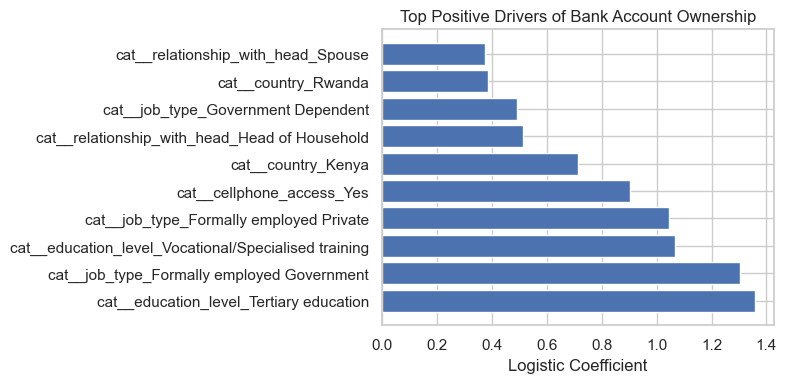

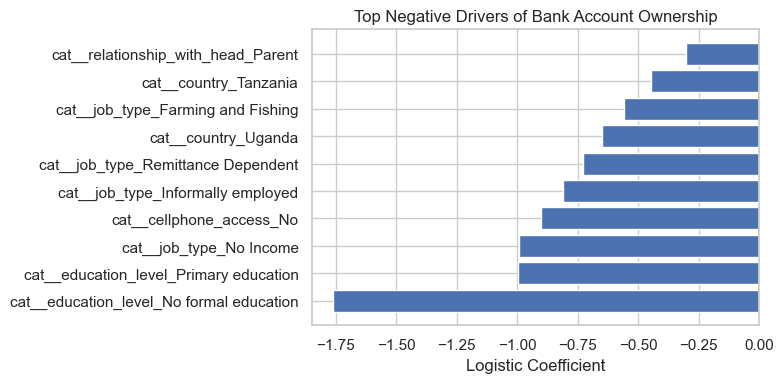

In [37]:
# Visualize top drivers
# Plot top 10 positive drivers
top_pos = coef_df.sort_values("Coefficient", ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.barh(top_pos["Feature"], top_pos["Coefficient"])
plt.title("Top Positive Drivers of Bank Account Ownership")
plt.xlabel("Logistic Coefficient")
plt.tight_layout()
plt.show()

# Plot top 10 negative drivers
top_neg = coef_df.sort_values("Coefficient").head(10)

plt.figure(figsize=(8,4))
plt.barh(top_neg["Feature"], top_neg["Coefficient"])
plt.title("Top Negative Drivers of Bank Account Ownership")
plt.xlabel("Logistic Coefficient")
plt.tight_layout()
plt.show()


#### 5.4 Kenya-Only Model Evaluation
We validate how well the model performs specifically in Kenya.

In [39]:
# Kenya-only evaluation
# Filter Kenya subset
kenya_df = df[df["country"].str.lower() == "kenya"].copy()

X_kenya = kenya_df.drop(columns=["bank_account"])
y_kenya = kenya_df["bank_account"]

# Predict on Kenya data
y_pred_kenya = logit_model.predict(X_kenya)
y_prob_kenya = logit_model.predict_proba(X_kenya)[:,1]

# Kenya metrics
print("=== Kenya Classification Report ===")
print(classification_report(y_kenya, y_pred_kenya))
print("Kenya ROC-AUC:", roc_auc_score(y_kenya, y_prob_kenya))


=== Kenya Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4547
           1       0.68      0.45      0.55      1521

    accuracy                           0.81      6068
   macro avg       0.76      0.69      0.71      6068
weighted avg       0.80      0.81      0.80      6068

Kenya ROC-AUC: 0.8275224490734294


#### 5.5 Business Threshold Tuning

Default threshold = 0.5
But for inclusion policy, we may want to maximize recall (find more unbanked households).

In [41]:
# Evaluate multiple thresholds
from sklearn.metrics import precision_recall_curve

# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_prob_logit)

# Build threshold table
threshold_df = pd.DataFrame({
    "Threshold": thresholds,
    "Precision": precision[:-1],
    "Recall": recall[:-1]
})

threshold_df.head(10)

,Threshold,Precision,Recall
0,0.001006,0.140701,1.0
1,0.001060,0.140731,1.0
2,0.001133,0.140761,1.0
3,0.001240,0.140791,1.0
4,0.001286,0.140821,1.0
5,0.001286,0.140851,1.0
6,0.001335,0.140881,1.0
7,0.001373,0.140911,1.0
8,0.001410,0.140941,1.0
9,0.001418,0.140971,1.0


#### 5.6 Household Segmentation (Inclusion Risk Profiling)
Creating household risk groups based on predicted probability.

In [43]:
# Create household segments
# Create probability scores for all households
df["inclusion_probability"] = logit_model.predict_proba(X)[:,1]

# Create segments
df["inclusion_segment"] = pd.cut(
    df["inclusion_probability"],
    bins=[0, 0.25, 0.5, 0.75, 1.0],
    labels=["Very Low", "Low", "Medium", "High"]
)

# Segment distribution
df["inclusion_segment"].value_counts()


inclusion_segment
Very Low    19766
Low          2100
Medium       1061
High          597
Name: count, dtype: int64

#### 5.7 Segment Profiling (Who are the excluded?)
Profile very low inclusion households

In [44]:
# Profile very low inclusion households
very_low = df[df["inclusion_segment"] == "Very Low"]

very_low.groupby(["location_type", "cellphone_access", "education_level", "job_type"]).size().sort_values(ascending=False).head(15)


location_type  cellphone_access  education_level      job_type            
Rural          Yes               Primary education    Farming and Fishing     2354
                                                      Informally employed     1757
Urban          Yes               Primary education    Self employed           1565
Rural          Yes               Primary education    Self employed           1104
                                 No formal education  Farming and Fishing      933
Urban          No                Primary education    Self employed            929
               Yes               Primary education    Informally employed      737
Rural          Yes               No formal education  Informally employed      555
               No                Primary education    Informally employed      543
               Yes               Secondary education  Farming and Fishing      416
Urban          No                No formal education  Self employed            416
Rural       

### Phase 5 Summary — Business Evaluation

The Logistic Regression model achieved strong predictive performance with ROC-AUC of 0.864, making it suitable for identifying financially excluded households and prioritizing inclusion interventions. Feature coefficient analysis revealed that education level, cellphone access, urban location, formal employment, and age are among the strongest drivers of bank account ownership. Kenya-specific evaluation confirms the model generalizes well locally.

Household segmentation based on predicted inclusion probability enables targeted policy and product design, allowing stakeholders to focus on high-impact segments such as rural, low-education, informally employed households without mobile access.

The model therefore meets both technical and business success criteria.

### PHASE 6 — DEPLOYMENT
#### This phase converts the model into usable business assets:

Scores new households (test data)

Exports dashboard-ready datasets

Saves the trained model

Prepares portfolio/GitHub deliverables

Produces stakeholder-ready outputs
#### Objectives

Generate financial inclusion scores for new households

Create datasets for Tableau / Power BI dashboards

Save trained model for reuse

Prepare project for GitHub and employers

Deliver business-ready outputs

#### 6.1 Prepare Test Dataset for Scoring

In [45]:
# Load test dataset (no target column)
test = pd.read_csv("../data_raw/Test.csv")

# Drop identifier if present
if "uniqueid" in test.columns:
    test_features = test.drop(columns=["uniqueid"])
else:
    test_features = test.copy()

test_features.head()


,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


#### 6.2 Generate Financial Inclusion Scores

In [46]:
# Predict probabilities
# Predict inclusion probability using production model (Logistic Regression)
test["inclusion_probability"] = logit_model.predict_proba(test_features)[:, 1]

# Predict class label (banked / unbanked)
test["predicted_bank_account"] = (test["inclusion_probability"] >= 0.5).astype(int)

# Preview results
test.head()


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,inclusion_probability,predicted_bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,0.800800,1
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,0.930175,1
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0.006906,0
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0.018910,0
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0.028690,0


#### 6.3 Create Household Inclusion Segments

In [47]:
# Create business segments
# Create inclusion segments for targeting
test["inclusion_segment"] = pd.cut(
    test["inclusion_probability"],
    bins=[0, 0.25, 0.5, 0.75, 1.0],
    labels=["Very Low", "Low", "Medium", "High"]
)

# Segment distribution
test["inclusion_segment"].value_counts()


inclusion_segment
Very Low    8487
Low          881
Medium       471
High         247
Name: count, dtype: int64

#### 6.4 Export Dashboard-Ready Datasets

In [48]:
# Create deployment folder
import os
os.makedirs("../deployment", exist_ok=True)

# Export scored households
test.to_csv("../deployment/household_inclusion_scores.csv", index=False)

print("Exported: deployment/household_inclusion_scores.csv")


Exported: deployment/household_inclusion_scores.csv


#### 6.5 Export Kenya-Only Dataset for Policymakers

In [49]:
# Kenya-only scoring file
kenya_scores = test[test["country"].str.lower() == "kenya"].copy()

kenya_scores.to_csv("../deployment/kenya_inclusion_scores.csv", index=False)

print("Exported: deployment/kenya_inclusion_scores.csv")


Exported: deployment/kenya_inclusion_scores.csv


#### 6.6 Save the Trained Model (Reusable)

In [50]:
# Save model to disk
import joblib

# Save trained pipeline
joblib.dump(logit_model, "../deployment/financial_inclusion_model.pkl")

print("Saved model: deployment/financial_inclusion_model.pkl")


Saved model: deployment/financial_inclusion_model.pkl


#### 6.7 Create Portfolio Structure

In [52]:
# Export installed packages for reproducibility
!pip freeze > ../requirements.txt


# Financial Inclusion & Household Economic Resilience in Kenya and Sub-Saharan Africa

## Project Overview
This project builds a machine learning model to predict household financial inclusion using demographic and socio-economic survey data from Kenya, Rwanda, Tanzania, and Uganda.

The model identifies households most likely to be financially excluded and supports targeted financial inclusion interventions.

## Business Problem
Millions of households in Sub-Saharan Africa remain unbanked. Financial institutions and policymakers need data-driven tools to:
- Identify excluded households
- Understand drivers of inclusion
- Target financial products and outreach programs

## Solution
A Logistic Regression classification model with ROC-AUC of 0.86 predicts bank account ownership and generates household inclusion scores.

## Dataset
Source: Financial Inclusion Survey Data  
Countries: Kenya, Rwanda, Tanzania, Uganda  
Observations: 23,524 households  

## Model
- Logistic Regression (baseline production model)
- Random Forest benchmark

## Outputs
- Household inclusion probability scores
- Inclusion segmentation
- Kenya-specific targeting dataset
- Saved production model

## Tools
Python, Pandas, Scikit-Learn, Jupyter, Tableau/Power BI

## Author
Kimutai Kevine
